# ASSIGNMENT 9

1. Load in the data. The target column should be considered as whether a patient will develop heart disease or not.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [7]:
df.describe().unstack()

age     count    303.000000
        mean      54.366337
        std        9.082101
        min       29.000000
        25%       47.500000
                    ...    
target  min        0.000000
        25%        0.000000
        50%        1.000000
        75%        1.000000
        max        1.000000
Length: 112, dtype: float64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
duplicate = df[df.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [20]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [21]:
duplicate.shape

(1, 14)

2. Explore the data. Notice all columns are numerical. Therefore separate the continuous from the discrete features.

In [24]:
discrete = []

In [28]:
for item in df:
    
    if df[item].nunique() < 10:
        print(item, 'values:', df[item].unique())
        discrete.append(item)
        print('{} is discrete'.format(item))
    else:
        pass
    
discrete

sex values: [1 0]
sex is discrete
cp values: [3 2 1 0]
cp is discrete
fbs values: [1 0]
fbs is discrete
restecg values: [0 1 2]
restecg is discrete
exang values: [0 1]
exang is discrete
slope values: [0 2 1]
slope is discrete
ca values: [0 2 1 3 4]
ca is discrete
thal values: [1 2 3 0]
thal is discrete
target values: [1 0]
target is discrete


['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'target',
 'sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'target',
 'sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'target']

In [30]:
continuous = [var for var in df if var not in discrete]
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

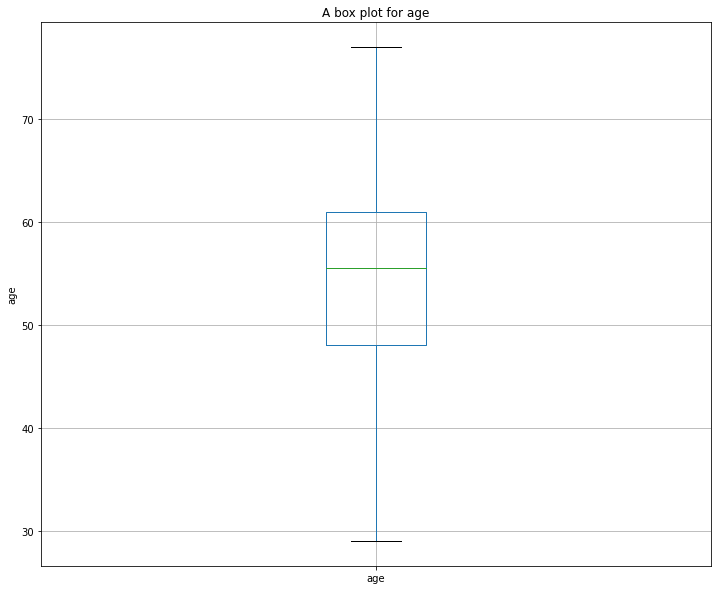

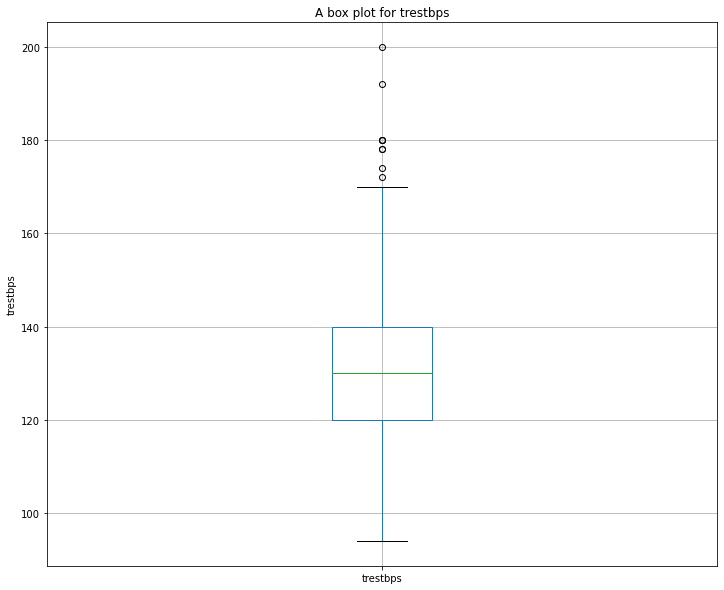

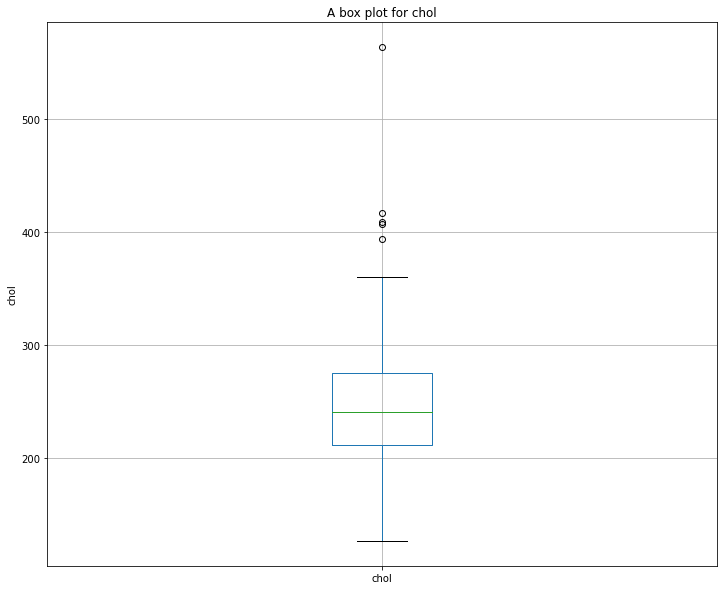

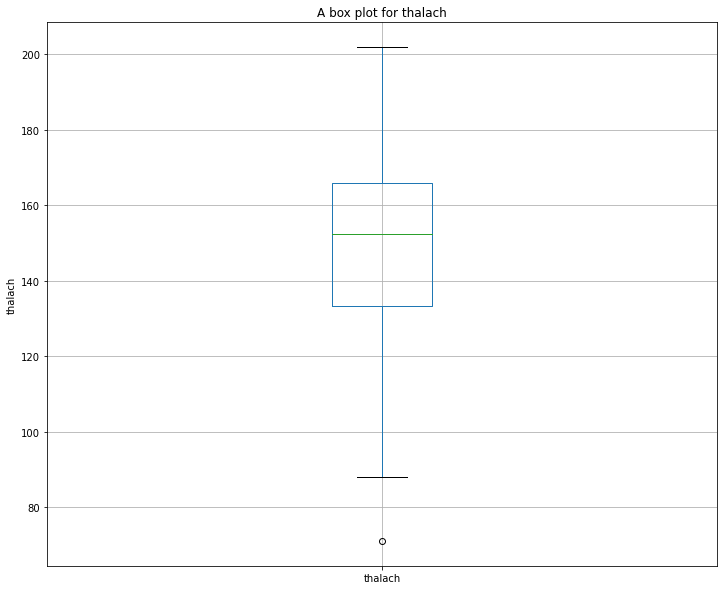

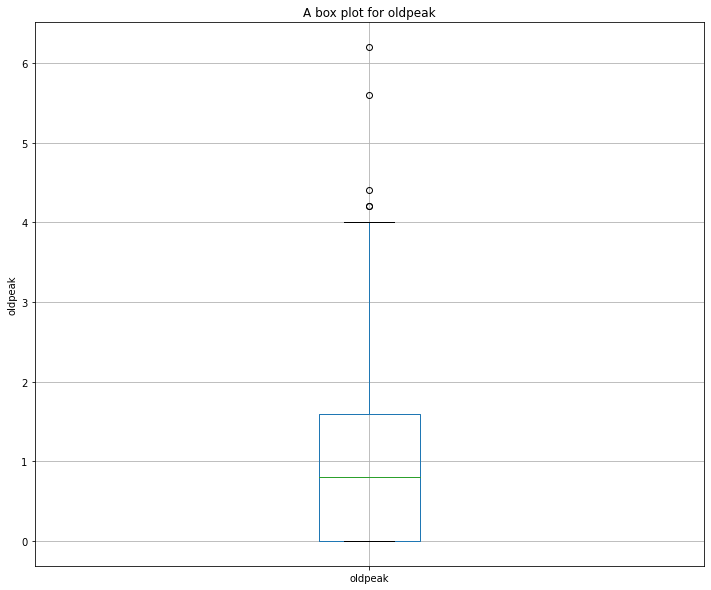

In [32]:
for var in continuous:
    
    plt.figure(figsize = (12,10))
    fig = df.boxplot(column = var)
    fig.set_title('A box plot for {}'.format(var))
    fig.set_ylabel(var)

3. Identify any presence of outliers in the continuous features and resolve them using the IQR method.

In [33]:
continuous_outliers = []

In [38]:
for var in continuous[:]:
    
    if var != 'age':
        continuous_outliers.append(var)
        
continuous_outliers

['trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak']

In [43]:
q1 = df.trestbps.quantile(0.25)
q3 = df.trestbps.quantile(0.75)

trestbps_iqr = q3 - q1
trestbps_iqr

20.0

In [58]:
low_limit = q1 - trestbps_iqr*1.5
up_limit = q3+ trestbps_iqr*1.5

print(low_limit, up_limit)

90.0 170.0


In [65]:
df[(df.trestbps< low_limit) | (df.trestbps > up_limit)].shape

(9, 14)

In [69]:
df1 = df[(df.trestbps> low_limit) & (df.trestbps < up_limit)]

In [70]:
df1.shape

(289, 14)

<AxesSubplot:>

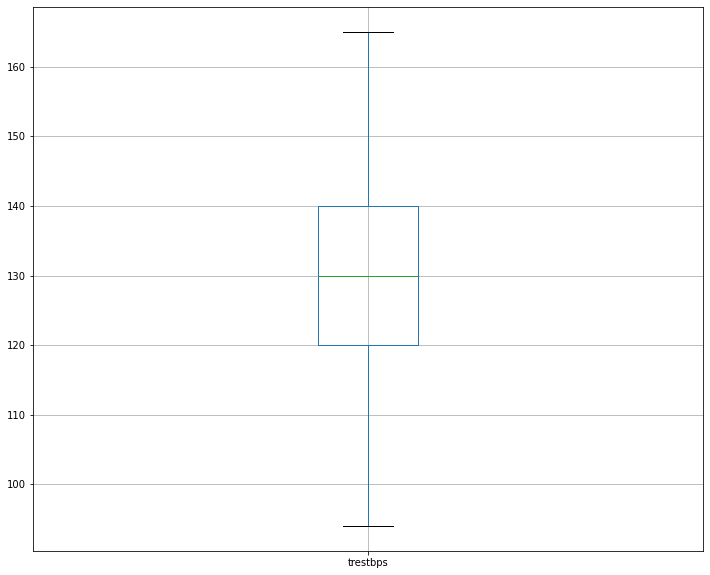

In [73]:
plt.figure(figsize = (12,10))

df1.boxplot(column = 'trestbps')

In [78]:
q1 = df1.chol.quantile(0.25)
q3 = df1.chol.quantile(0.75)
chol_iqr = q3 - q1
chol_iqr

62.0

In [80]:
low_limit = q1 - chol_iqr*1.5
up_limit = q3+ chol_iqr*1.5

print(low_limit)
print(up_limit)

118.0
366.0


In [81]:
df1[(df1.chol< low_limit)|(df1.chol> up_limit)].shape

df2 = df1[(df1.chol> low_limit)&(df1.chol < up_limit)]
print(df2.shape)

(284, 14)


<AxesSubplot:>

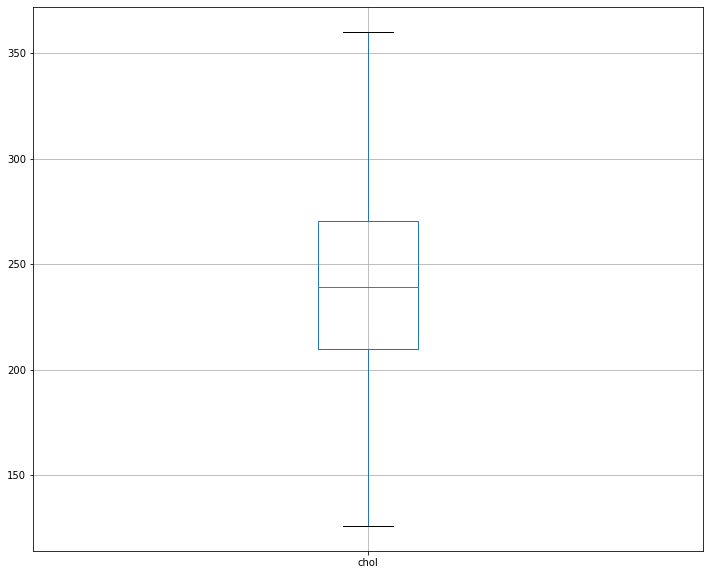

In [82]:
plt.figure(figsize = (12,10))
df2.boxplot(column = 'chol')

4. Binned the continuous column values apart from the column ‘oldpeak’.

In [88]:
df3 = df2[(df2.chol> lower_limit) & (df2.chol < upper_limit)]

In [89]:
q1 = df3.oldpeak.quantile(0.25)
q3 = df3.oldpeak.quantile(0.75)
oldpeak_iqr = q3 - q1
oldpeak_iqr

1.6

118.0
366.0
(0, 14)


<AxesSubplot:>

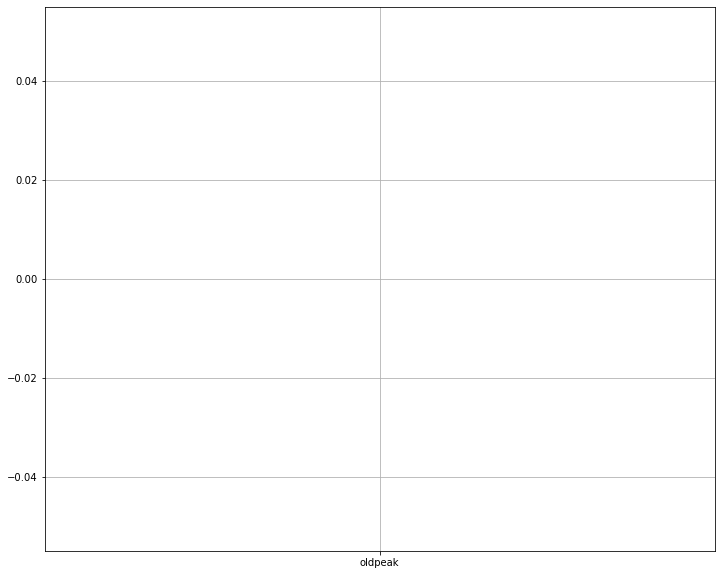

In [91]:
lower_limit = q1 - oldpeak_iqr*1.5
upper_limit = q3+ oldpeak_iqr*1.5
print(low_limit)
print(up_limit)

df3[(df3.oldpeak< low_limit)|(df3.oldpeak> up_limit)].shape
df_outliers_no = df3[(df3.oldpeak> low_limit)&(df3.oldpeak < up_limit)]
print(df_outliers_no.shape)

plt.figure(figsize = (12,10))
df_outliers_no.boxplot(column = 'oldpeak')

In [97]:
df_new = df_outliers_no.copy()

In [98]:
continuous


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [100]:
continuous_to_bin = []

In [101]:
for var in continuous[:]:
    if var != 'oldpeak':
        continuous_to_bin.append(var)
continuous_to_bin

['age', 'trestbps', 'chol', 'thalach']

In [106]:
df_outliers_no.age.max()

nan

In [107]:
 df_outliers_no.age.min()

nan

In [109]:
age_range = []


In [110]:
for age in range (25,80,10):
    age_range.append('{0} - {1}'.format(age, age + 9.0))

df_new['age_range'] = pd.cut(x = df_new['age'], bins = 6, labels = age_range)
df_new.head()

ValueError: Cannot cut empty array